[[-30.  16.  -1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 16. -30.  16.  -1.   0.   0.   0.   0.   0.   0.   0.]
 [ -1.  16. -30.  16.  -1.   0.   0.   0.   0.   0.   0.]
 [  0.  -1.  16. -30.  16.  -1.   0.   0.   0.   0.   0.]
 [  0.   0.  -1.  16. -30.  16.  -1.   0.   0.   0.   0.]
 [  0.   0.   0.  -1.  16. -30.  16.  -1.   0.   0.   0.]
 [  0.   0.   0.   0.  -1.  16. -30.  16.  -1.   0.   0.]
 [  0.   0.   0.   0.   0.  -1.  16. -30.  16.  -1.   0.]
 [  0.   0.   0.   0.   0.   0.  -1.  16. -30.  16.  -1.]
 [  0.   0.   0.   0.   0.   0.   0.  -1.  16. -30.  16.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  -1.  16. -30.]]
[ 0.00000000e+00 -3.65985059e-01  0.00000000e+00 -9.58161323e-01
 -1.12638619e+00 -1.18435253e+00 -1.12638619e+00 -9.58161323e-01
  0.00000000e+00 -3.65985059e-01 -1.45041353e-16]


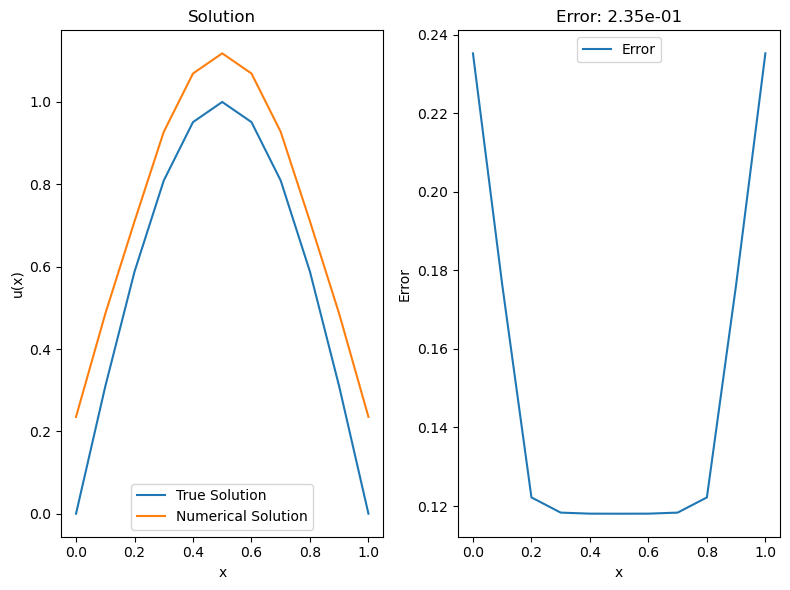

In [81]:
import numpy as np

# Grid parameters
a, b = 0, 1
n = 10
h = (b - a) / n
x = np.linspace(a, b, n+1)

# Function u(x)
def u_true(x):
    return np.sin(np.pi * x)

# Function f(x)
def f(x):
    return -np.pi*np.pi*np.sin(np.pi * x)

# Boundary conditions
alpha = 0
beta = 0

# Initialize the solution array
u = np.zeros(n+1)

# Construct the system matrix A and right-hand side vector b
A = np.zeros((n+1, n+1))
b = np.zeros(n+1)

# Fill interior points with a 5-point stencil
for i in range(2, n-1):
    A[i, i-2] = -1
    A[i, i-1] = 16
    A[i, i] = -30
    A[i, i+1] = 16
    A[i, i+2] = -1
    b[i] = 12*(h**2) * f(x[i])

# Apply central difference at x = a using ghost points

# First left ghost point
A[0, 0] = -30
A[0, 1] = 16
A[0, 2] = -1
b[0] = 12*(h**2) * f(x[0]) + (2*alpha - u[2]) - 16 * (2*alpha - u[1])

# Second left ghost point
A[1, 0] = 16
A[1, 1] = -30
A[1, 2] = 16
A[1, 3] = -1
b[1] = 12*(h**2) * f(x[1]) + (2*alpha - u[3])

# Apply central difference at x = b using ghost points

# Last right ghost point
A[n, n] = -30
A[n, n-1] = 16
A[n, n-2] = -1
b[n] = 12*(h**2) * f(x[n]) + (2*beta - u[n-2]) - 16 * (2*beta - u[n-1])

# Second to last right ghost point
A[n-1, n] = 16
A[n-1, n-1] = -30
A[n-1, n-2] = 16
A[n-1, n-3] = -1
b[n-1] = 12*(h**2) * f(x[n-1]) + (2*beta - u[n-3])

# Boundary conditions (Dirichlet)
b[2] = alpha
b[-3] = beta

print(A)

print(b)

# Solve the system
u = np.linalg.solve(A, b)

# Compute the error
error = np.max(np.abs(u_true(x)- u))

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# Plot the solution on the first subplot
ax1.plot(x, u_true(x), label='True Solution')
ax1.plot(x, u, label='Numerical Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.legend()
ax1.set_title('Solution')

# Plot the error on the second subplot
ax2.plot(x, np.abs(u_true(x)- u), label='Error')
ax2.set_xlabel('x')
ax2.set_ylabel('Error')
ax2.legend()
ax2.set_title('Error: %.2e' % error)

plt.tight_layout()
plt.show()

Matrix A:
[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ -1.  16. -30.  16.  -1.   0.   0.   0.   0.   0.   0.]
 [  0.  -1.  16. -30.  16.  -1.   0.   0.   0.   0.   0.]
 [  0.   0.  -1.  16. -30.  16.  -1.   0.   0.   0.   0.]
 [  0.   0.   0.  -1.  16. -30.  16.  -1.   0.   0.   0.]
 [  0.   0.   0.   0.  -1.  16. -30.  16.  -1.   0.   0.]
 [  0.   0.   0.   0.   0.  -1.  16. -30.  16.  -1.   0.]
 [  0.   0.   0.   0.   0.   0.  -1.  16. -30.  16.  -1.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]]
Vector b:
[ 0.          0.         -0.69614495 -0.95816132 -1.12638619 -1.18435253
 -1.12638619 -0.95816132 -0.69614495  0.          0.        ]


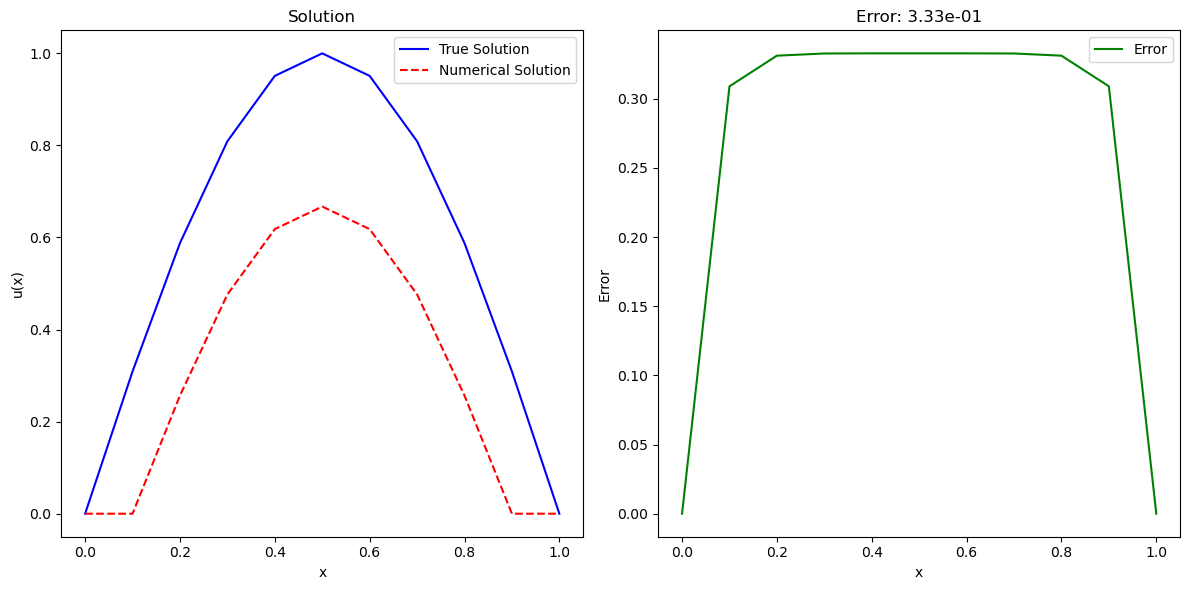

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
a, b = 0, 1
n = 10
h = (b - a) / n
x = np.linspace(a, b, n+1)

# Function u(x)
def u_true(x):
    return np.sin(np.pi * x)

# Function f(x)
def f(x):
    return -np.pi*np.pi*np.sin(np.pi * x)

# Boundary conditions
alpha = 0
beta = 0

# Initialize the solution array
u = np.zeros(n+1)

# Construct the system matrix A and right-hand side vector b
A = np.zeros((n+1, n+1))
b = np.zeros(n+1)

# Fill interior points with a 5-point stencil
for i in range(2, n-1):
    A[i, i-2] = -1
    A[i, i-1] = 16
    A[i, i] = -30
    A[i, i+1] = 16
    A[i, i+2] = -1
    b[i] = 12 * (h**2) * f(x[i])

# Apply Dirichlet boundary conditions directly
A[0, 0] = 1
b[0] = (2*alpha - 16*alpha)
A[1, 1] = 1
b[1] = (2*alpha - alpha)

A[n, n] = 1
b[n] = (2*beta - 16*beta)
A[n-1, n-1] = 1
b[n-1] = (2*beta - beta)

print("Matrix A:")
print(A)

print("Vector b:")
print(b)

# Solve the system
u = np.linalg.solve(A, b)

# Compute the error
error = np.max(np.abs(u_true(x) - u))

# Plot the solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(x, u_true(x), label='True Solution', color='blue')
ax1.plot(x, u, label='Numerical Solution', color='red', linestyle='dashed')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
ax1.legend()
ax1.set_title('Solution')

ax2.plot(x, np.abs(u_true(x) - u), label='Error', color='green')
ax2.set_xlabel('x')
ax2.set_ylabel('Error')
ax2.legend()
ax2.set_title(f'Error: {error:.2e}')

plt.tight_layout()
plt.show()
